<a href="https://colab.research.google.com/github/PiyushMankad/TCD-Computer-Vision/blob/master/mankadp%40tcd.ie_CV2_Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST.py**

In [0]:
# pip install Cython
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

# **Question 1.a**

1. **Learning Rate**: It is a Hyperparameter that determines how quickly a model learns its given data. When you use a very small value the learning takes a lot of time and also the model is overfitted on the data. A very large value that takes comparitively lesser time to learn but gives a bad accuracy. also, if there were more than one epochs we may see its value oscillating.
**Explanation**

A smaller learning rate ensures that the model converges to it its optimal local minima as the weights get updated little by little while a larger learning rate may never converge and can even jump to another curve. 

2. **Weight Decay**: A type of L2 regularization used to prevent overfitting in the data. A smaller value is able to prevent overfitting to some extent while a larger value is not able to prevent the overfitting and also may result in a drop in accuracy.
**Explanation**

A smaller value for weight decay would decrease the updated weight of the model in every iteration so the model may have a lesser accuracy on the test case but it would be a generalized model that is bound to give the same accuracy on any dataset(that is it prevents a high variance model) while a higher weight decay would decrease the updated weight even further which would lead to the training of a high bias model that performs poorly everywhere.


0it [00:00, ?it/s]

9920512it [00:02, 3888825.48it/s]                            


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 57214.83it/s]                           
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


1654784it [00:01, 871635.41it/s]                             
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


8192it [00:00, 21523.08it/s]            


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


 Results with Learning rate 0.001 and Weight Decay 0.0001
Test set: Average loss: 0.1280, Accuracy: 9609/10000 (96%)



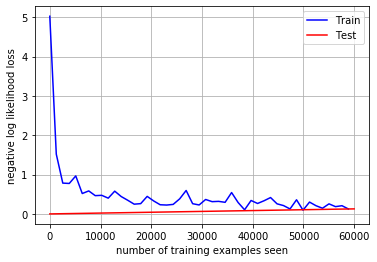

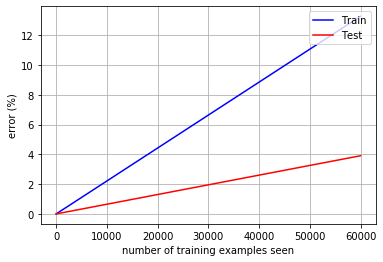

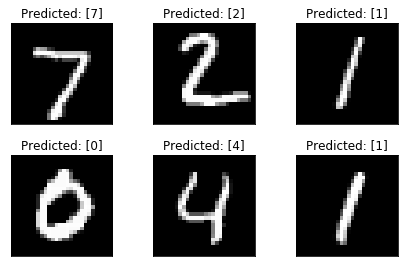



 Results with Learning rate 0.001 and Weight Decay 0.05
Test set: Average loss: 0.1349, Accuracy: 9674/10000 (97%)



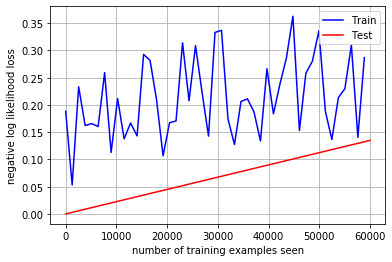

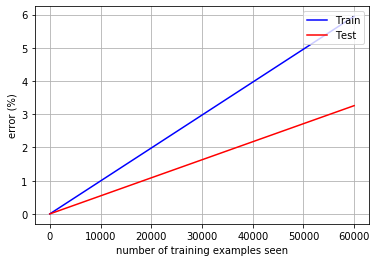

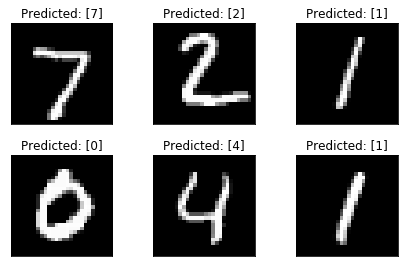



 Results with Learning rate 0.001 and Weight Decay 0.1
Test set: Average loss: 0.2133, Accuracy: 9572/10000 (96%)



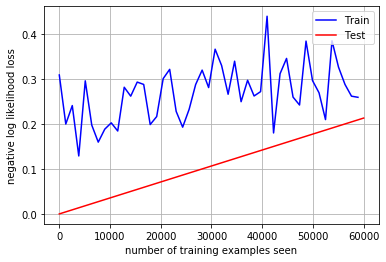

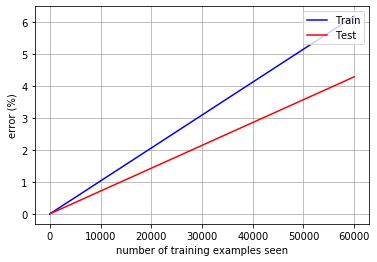

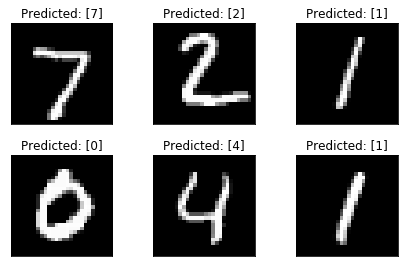



 Results with Learning rate 0.01 and Weight Decay 0.0001
Test set: Average loss: 0.0475, Accuracy: 9843/10000 (98%)



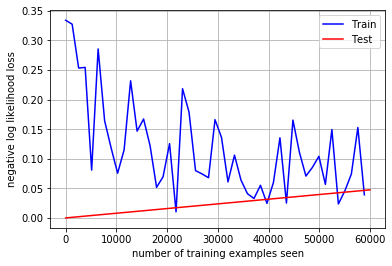

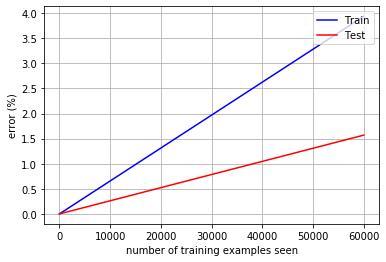

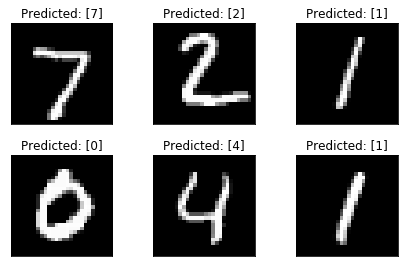



 Results with Learning rate 0.01 and Weight Decay 0.05
Test set: Average loss: 0.1569, Accuracy: 9596/10000 (96%)



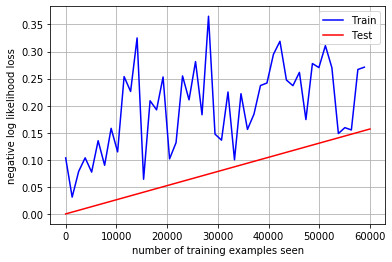

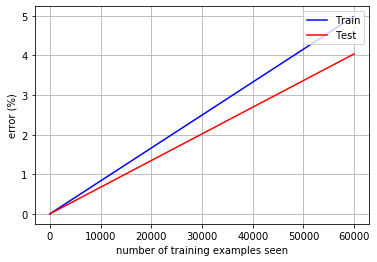

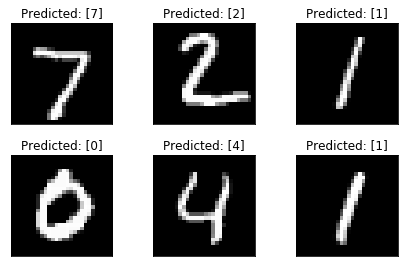



 Results with Learning rate 0.01 and Weight Decay 0.1
Test set: Average loss: 0.2271, Accuracy: 9508/10000 (95%)



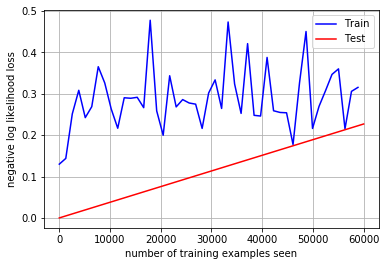

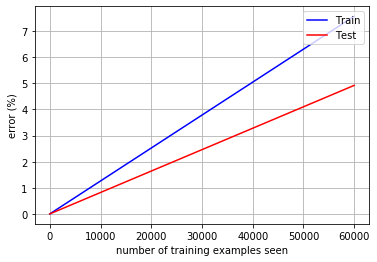

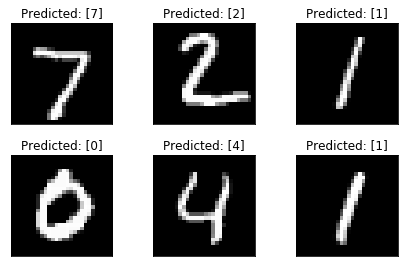



 Results with Learning rate 0.1 and Weight Decay 0.0001
Test set: Average loss: 0.2370, Accuracy: 9368/10000 (94%)



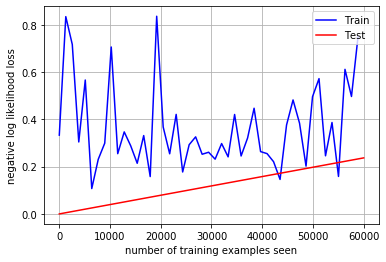

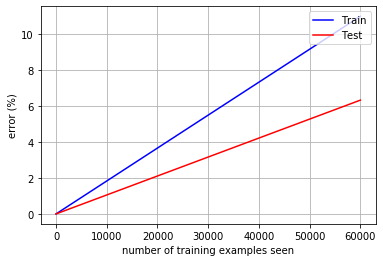

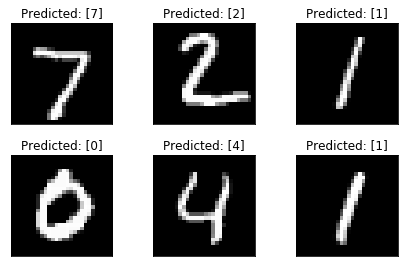



 Results with Learning rate 0.1 and Weight Decay 0.05
Test set: Average loss: 0.6768, Accuracy: 7954/10000 (80%)



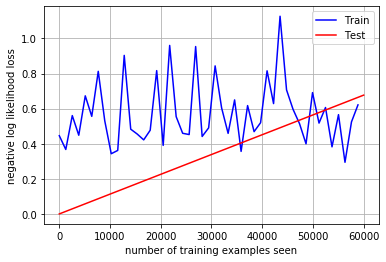

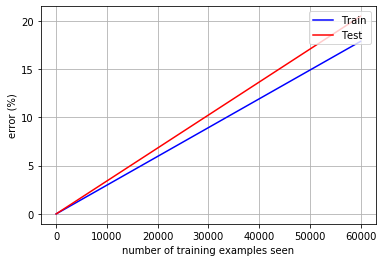

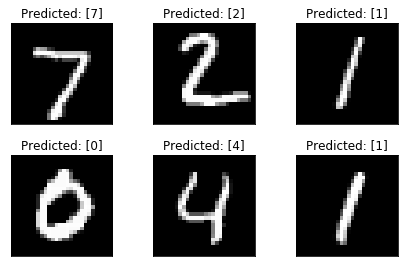



 Results with Learning rate 0.1 and Weight Decay 0.1
Test set: Average loss: 0.5369, Accuracy: 8354/10000 (84%)



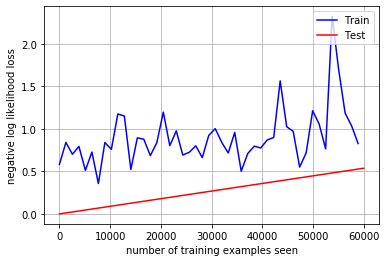

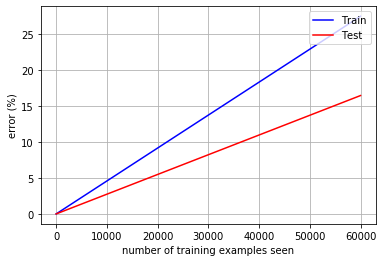

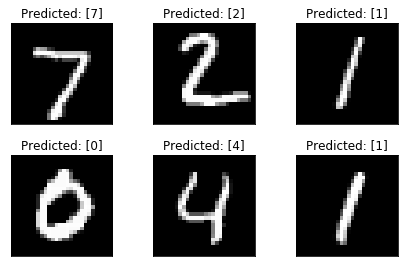

In [3]:


# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = [0.001,0.01,0.1] # TODO
momentum = 0.9
weight_decay = [0.0001,0.05,0.1] # TODO
log_interval = 20

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        ## wrong input channels 
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(in_features=3136, out_features=196)
        self.fc2 = nn.Linear(in_features=196, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        # TODO   
        '''
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=32, 
                               kernel_size=7, stride=1, padding=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=16, 
                               kernel_size=3, stride=1, padding=1)
        self.dropout = nn.Dropout(p=0.2)
        self.fc1 = nn.Linear(in_features=576 , out_features=196)
        self.fc2 = nn.Linear(in_features=196, out_features=10)
        '''
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        ## wrong input channels 
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(in_features=3136, out_features=196)
        self.fc2 = nn.Linear(in_features=196, out_features=10)
        self.dropout = nn.Dropout(p=0.2)
        

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        # nn.init.kaiming_normal_(self.conv3.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')     

    def forward(self, x):
        # TODO
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)        
        
        x = x.view(-1, 3136)
        # x = x.view(-1, 576)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            #print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    test_data = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)


    # model creation
    model = CNN3().to(device)
    
    for alpha in learning_rate:
      for beta in (weight_decay):
        # optimizer creation
        optimizer = optim.SGD(model.parameters(), lr=alpha, momentum=momentum, weight_decay=beta)

        # lists for saving history
        train_losses = []
        train_counter = []
        test_losses = [0]
        test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
        train_errors = [0]
        test_errors = [0]
        error_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]

        # global training and testing loop
        for epoch in range(1, epochs + 1):
            train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
            print("\n\n Results with Learning rate {} and Weight Decay {}".format(alpha,beta))
            test(model, device, test_loader, losses=test_losses, errors=test_errors)
        

        # plotting training history
        #print("train_counter{}, train_losses{}, test_counter{}, test_losses{}".format(train_counter, train_losses, test_counter, test_losses))
        plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
        plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
        
        #print("error_counter:{}, train_errors:{}, error_counter:{}, test_errors:{}".format(error_counter, train_errors, error_counter, test_errors))
        # extract and plot random samples of data with predicted labels
        data, _, pred = predict_batch(model, device, test_loader)
        plot_data(data, pred, 'Predicted')
        
    
if __name__ == '__main__':
    main()
    pass


**Question 1.b**

Using convolution 2nd layer ie CNN2


 Also, Using CNN2 in as model in this funtion 
Results with Learning rate 0.001 and Weight Decay 0.001
Test set: Average loss: 0.0910, Accuracy: 9728/10000 (97%)



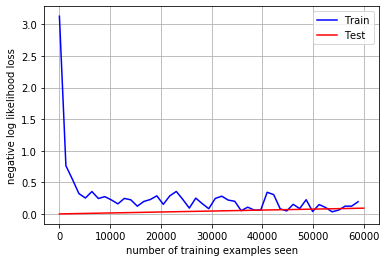

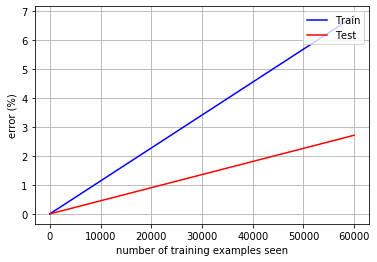

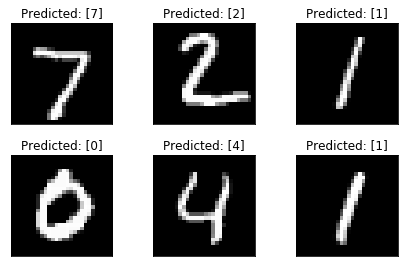

In [4]:
def Convolution2():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    test_data = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN2().to(device)
    
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=momentum, weight_decay=0.001)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = [0]
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = [0]
    test_errors = [0]
    error_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    
    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        print("\n Also, Using CNN2 in as model in this funtion \nResults with Learning rate 0.001 and Weight Decay 0.001")
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
    

    # plotting training history
    #print("train_counter{}, train_losses{}, test_counter{}, test_losses{}".format(train_counter, train_losses, test_counter, test_losses))
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
    
    #print("error_counter:{}, train_errors:{}, error_counter:{}, test_errors:{}".format(error_counter, train_errors, error_counter, test_errors))
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')

Convolution2()

#**Question 1.c AND Question 1.d**

*Running both the models in continuation for comparison*


---



The Model CNN3 is using dropout function which prevents the model from overfitting by dropping a neuron at random so that the neural network does not learn to be dependant on any particular feature.

The results show that the accuracy actually increases after using Dropout in CNN3 that has the same configuration as that of CNN2.

0it [00:00, ?it/s]

26427392it [00:04, 6062154.68it/s]                              


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 39520.11it/s]                           
0it [00:00, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw


4423680it [00:02, 1701576.63it/s]                            
0it [00:00, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


8192it [00:00, 15218.45it/s]            
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw
Processing...
Done!
Fashion MNIST mean: 0.2860164940357208,Fashion MNIST std dev: 0.35302427411079407


Using CNN2

 Also, Using CNN2 and CNN3 as model in Fashion MNIST Dataset 
Results with Learning rate 0.001 and Weight Decay 0.0001
Test set: Average loss: 0.4869, Accuracy: 8271/10000 (83%)


 Also, Using CNN2 and CNN3 as model in Fashion MNIST Dataset 
Results with Learning rate 0.001 and Weight Decay 0.0001
Test set: Average loss: 0.4138, Accuracy: 8558/10000 (86%)



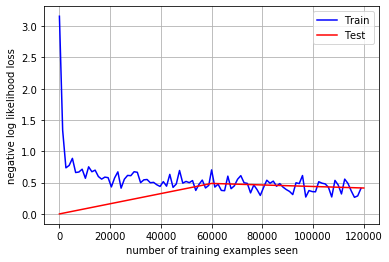

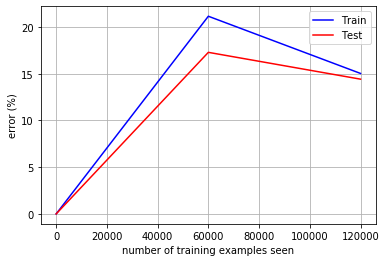

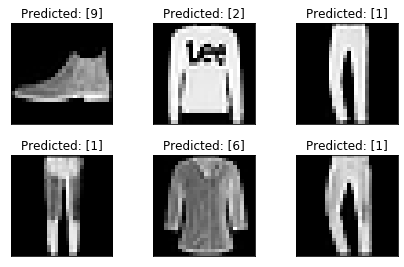



Using CNN3

 Also, Using CNN2 and CNN3 as model in Fashion MNIST Dataset 
Results with Learning rate 0.001 and Weight Decay 0.0001
Test set: Average loss: 0.5622, Accuracy: 7963/10000 (80%)


 Also, Using CNN2 and CNN3 as model in Fashion MNIST Dataset 
Results with Learning rate 0.001 and Weight Decay 0.0001
Test set: Average loss: 0.5015, Accuracy: 8156/10000 (82%)



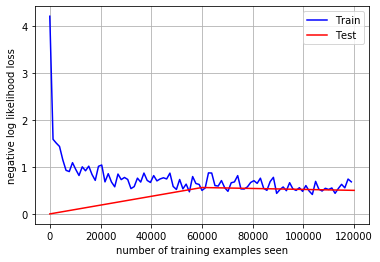

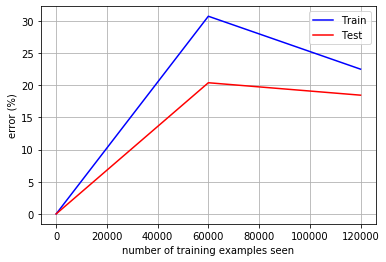

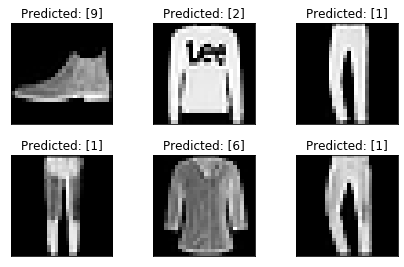

In [5]:
# Training hyperparameters
epochs = 2
batch_size = 64
momentum = 0.7
log_interval = 20

def FashionMnist(Fmean,Fstd):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    # transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)])
    train_data = datasets.FashionMNIST('../data', train=True, download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((Fmean,), (Fstd,))]))
    test_data = datasets.FashionMNIST('../data', train=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((Fmean,), (Fstd,))]))

    #print("mean",tf.reduce_mean(train_data))
    #print(int(train_data))


    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

    # model creation
    model2 = CNN2().to(device)
    model3 = CNN3().to(device)
    models = [model2,model3]
    for i, model in enumerate(models):
      if i == 0:
        print("\n\nUsing CNN2")
      else:
        print("\n\nUsing CNN3")

      # optimizer creation
      learning_rate = 0.001 #learning_rate
      beta = 0.0001 #weight decay
      optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=beta)

      # lists for saving history
      train_losses = []
      train_counter = []
      test_losses = [0]
      test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
      train_errors = [0]
      test_errors = [0]
      error_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]

      # global training and testing loop
      for epoch in range(1, epochs + 1):
          train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
          print("\n Also, Using CNN2 and CNN3 as model in Fashion MNIST Dataset \nResults with Learning rate {} and Weight Decay {}".format(learning_rate,beta))
          test(model, device, test_loader, losses=test_losses, errors=test_errors)
      

      # plotting training history
      #print("train_counter{}, train_losses{}, test_counter{}, test_losses{}".format(train_counter, train_losses, test_counter, test_losses))
      plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
      plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
      
      #print("error_counter:{}, train_errors:{}, error_counter:{}, test_errors:{}".format(error_counter, train_errors, error_counter, test_errors))
      # extract and plot random samples of data with predicted labels
      data, _, pred = predict_batch(model, device, test_loader)
      plot_data(data, pred, 'Predicted')

## calculating Mean and Standard deviation
train_data = datasets.FashionMNIST('../data', train=True, download=True,transform=transforms.Compose(transforms.ToTensor()))
Fmean = (train_data.train_data.float().mean())/255
Fstd = (train_data.train_data.float().std())/255
print("Fashion MNIST mean: {},Fashion MNIST std dev: {}".format(Fmean,Fstd))

FashionMnist(Fmean,Fstd)


# **Question 1.e**
Manually Computed

Filename: MANKADP@TCD.IE_out.csv

# **Question 1.f**

Manually calculated the FLOPs for each layer on the network

Filename: MANKADP@TCD.IE_params.csv